In [1]:
# 2021 / 07 / 07
# Dongil Choi
# Cart inverted Pendulum Model.

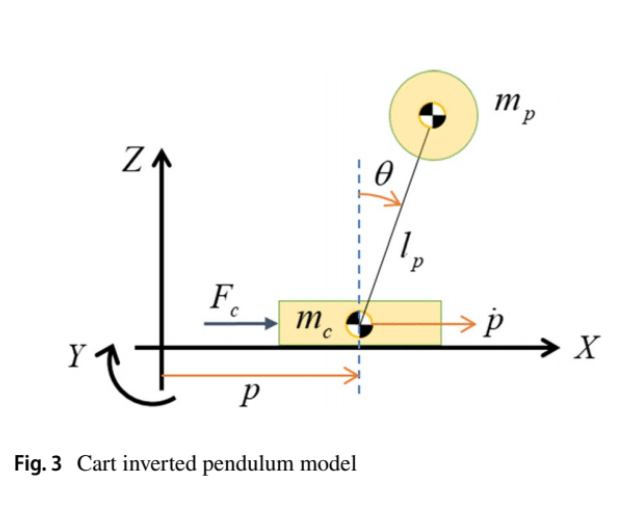

In [2]:
from IPython.display import Image
Image('figure/cart_pendulum_model.PNG', width=300)

In [3]:
from eom import *
from sympy import symbols, factor
from sympy import simplify
from sympy.physics.mechanics import *
from sympy import sin, cos, symbols, Matrix, solve
from sympy.physics.vector import init_vprinting
init_vprinting()

In [4]:
# Define Symbolic Variables
p,theta = dynamicsymbols('p,theta')
F_c = dynamicsymbols('F_c')
l_p = symbols('l_p')
m_c, m_p, g, t = symbols('m_c, m_p, g, t')

In [5]:
# Newtonian Reference Frames
N = ReferenceFrame('N')
No = Point('No') 
No.set_vel(N, 0)

# Cart
Co = No.locatenew('Co', p*N.x)
Co.set_vel(N, Co.pos_from(No).diff(t, N))
Cart = Particle('Cart', Co, m_c)

# Pendulum
P = N.orientnew('P', 'Axis', [theta, N.y])
Po = Co.locatenew('Po', l_p*P.z)
Po.set_vel(P, 0)
Pend = Particle('Pend', Po, m_p)

In [6]:
# Confirmation of dcm, angular velocity and acceleration
P.dcm(N), P.ang_vel_in(N).express(N).args[0][0], P.ang_acc_in(N).express(N).args[0][0]

⎛⎡cos(θ)  0  -sin(θ)⎤  ⎡0⎤  ⎡0⎤⎞
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢  0     1     0   ⎥, ⎢θ̇⎥, ⎢θ̈⎥⎟
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣sin(θ)  0  cos(θ) ⎦  ⎣0⎦  ⎣0⎦⎠

In [7]:
# Confirmation of Position, Velocity and Acceleration
Co.pos_from(No).express(N).args[0][0], Co.vel(N).express(N).args[0][0], Co.acc(N).express(N).args[0][0]

⎛⎡p⎤  ⎡ṗ⎤  ⎡p̈⎤⎞
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥, ⎢0⎥, ⎢0⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣0⎦  ⎣0⎦  ⎣0⎦⎠

In [8]:
# Confirmation of Position, Velocity and Acceleration
Po.pos_from(No).express(N).args[0][0], Po.vel(N).express(N).args[0][0], Po.acc(N).express(N).args[0][0]

⎛                                    ⎡             2                  ⎤⎞
⎜⎡lₚ⋅sin(θ) + p⎤  ⎡lₚ⋅cos(θ)⋅θ̇ + ṗ⎤  ⎢- lₚ⋅sin(θ)⋅θ̇  + lₚ⋅cos(θ)⋅θ̈ + p̈⎥⎟
⎜⎢             ⎥  ⎢               ⎥  ⎢                                ⎥⎟
⎜⎢      0      ⎥, ⎢       0       ⎥, ⎢               0                ⎥⎟
⎜⎢             ⎥  ⎢               ⎥  ⎢                                ⎥⎟
⎜⎣  lₚ⋅cos(θ)  ⎦  ⎣ -lₚ⋅sin(θ)⋅θ̇  ⎦  ⎢                            2   ⎥⎟
⎝                                    ⎣  -lₚ⋅sin(θ)⋅θ̈ - lₚ⋅cos(θ)⋅θ̇    ⎦⎠

In [9]:
# Generalized coordinates
q = Matrix([[p], [theta]])
qd = q.diff()
qdd = qd.diff()

# Lagranges Method
flist = [(Po, -m_p*g*N.z), (Co, F_c*N.x)] 
L = Lagrangian(N, Cart, Pend)
Le = LagrangesMethod(L, q, forcelist = flist, frame = N)
eoms = Le.form_lagranges_equations()
eoms_simple = simplify(eoms)
eoms_simple

⎡                2                                      ⎤
⎢- lₚ⋅mₚ⋅sin(θ)⋅θ̇  + lₚ⋅mₚ⋅cos(θ)⋅θ̈ + m_c⋅p̈ + mₚ⋅p̈ - F_c⎥
⎢                                                       ⎥
⎣          lₚ⋅mₚ⋅(-g⋅sin(θ) + lₚ⋅θ̈ + cos(θ)⋅p̈)          ⎦

In [10]:
inv_dyn = get_Simplified_EoM(eoms_simple, q)
inv_dyn

⎡                2                                      ⎤
⎢- lₚ⋅mₚ⋅sin(θ)⋅θ̇  + lₚ⋅mₚ⋅cos(θ)⋅θ̈ + (m_c + mₚ)⋅p̈ - F_c⎥
⎢                                                       ⎥
⎣          lₚ⋅mₚ⋅(-g⋅sin(θ) + lₚ⋅θ̈ + cos(θ)⋅p̈)          ⎦

In [11]:
linearlize_eq = {sin(theta):theta, cos(theta):1, theta.diff()**2:0}
inv_dyn_linear = msubs(inv_dyn, linearlize_eq)
inv_dyn_linear

⎡lₚ⋅mₚ⋅θ̈ + (m_c + mₚ)⋅p̈ - F_c⎤
⎢                            ⎥
⎣  lₚ⋅mₚ⋅(-g⋅θ + lₚ⋅θ̈ + p̈)   ⎦

In [12]:
# Control Input Variable
u = Matrix([F_c])

# M(q)*qdd + C(q,qd) + G(q) = W*u
M, C, G, W = get_EoM_from_T(inv_dyn_linear,qdd,g,u)
M, C, G, W

⎛⎡m_c + mₚ  lₚ⋅mₚ ⎤                        ⎞
⎜⎢                ⎥  ⎡0⎤  ⎡    0     ⎤  ⎡1⎤⎟
⎜⎢            2   ⎥, ⎢ ⎥, ⎢          ⎥, ⎢ ⎥⎟
⎝⎣ lₚ⋅mₚ    lₚ ⋅mₚ⎦  ⎣0⎦  ⎣-g⋅lₚ⋅mₚ⋅θ⎦  ⎣0⎦⎠

In [13]:
# Forward Dynamics eqation
# qdd = M(q)^-1 * ( -C(q,qd) - G(q) + W*u )
M_inv = M.inv()
qdd_rhs_A = M_inv*(-C -G)
qdd_rhs_B = M_inv*W*u
qdd_rhs_A, qdd_rhs_B

⎛⎡          -g⋅mₚ⋅θ           ⎤          ⎞
⎜⎢          ────────          ⎥  ⎡ F_c  ⎤⎟
⎜⎢            m_c             ⎥  ⎢ ───  ⎥⎟
⎜⎢                            ⎥  ⎢ m_c  ⎥⎟
⎜⎢        ⎛  1         1   ⎞  ⎥, ⎢      ⎥⎟
⎜⎢g⋅lₚ⋅mₚ⋅⎜────── + ───────⎟⋅θ⎥  ⎢-F_c  ⎥⎟
⎜⎢        ⎜  2        2    ⎟  ⎥  ⎢──────⎥⎟
⎝⎣        ⎝lₚ ⋅mₚ   lₚ ⋅m_c⎠  ⎦  ⎣lₚ⋅m_c⎦⎠

In [14]:
# State-space equation. 
X = q.col_join(qd)
Xd_A = qd.col_join(qdd_rhs_A)
Xd_B = qd.col_join(qdd_rhs_B)
U = u
Xd_A, Xd_B, X, U

⎛⎡             ṗ              ⎤                      ⎞
⎜⎢                            ⎥  ⎡  ṗ   ⎤            ⎟
⎜⎢             θ̇              ⎥  ⎢      ⎥            ⎟
⎜⎢                            ⎥  ⎢  θ̇   ⎥  ⎡p⎤       ⎟
⎜⎢          -g⋅mₚ⋅θ           ⎥  ⎢      ⎥  ⎢ ⎥       ⎟
⎜⎢          ────────          ⎥  ⎢ F_c  ⎥  ⎢θ⎥       ⎟
⎜⎢            m_c             ⎥, ⎢ ───  ⎥, ⎢ ⎥, [F_c]⎟
⎜⎢                            ⎥  ⎢ m_c  ⎥  ⎢ṗ⎥       ⎟
⎜⎢        ⎛  1         1   ⎞  ⎥  ⎢      ⎥  ⎢ ⎥       ⎟
⎜⎢g⋅lₚ⋅mₚ⋅⎜────── + ───────⎟⋅θ⎥  ⎢-F_c  ⎥  ⎣θ̇⎦       ⎟
⎜⎢        ⎜  2        2    ⎟  ⎥  ⎢──────⎥            ⎟
⎝⎣        ⎝lₚ ⋅mₚ   lₚ ⋅m_c⎠  ⎦  ⎣lₚ⋅m_c⎦            ⎠

In [15]:
# State-space equation
A = Xd_A.jacobian(X)
B = Xd_B.jacobian(U)
C = X.jacobian(X)
D = X.jacobian(U)
A, B, C, D

⎛⎡0              0               1  0⎤                             ⎞
⎜⎢                                   ⎥  ⎡  0   ⎤                   ⎟
⎜⎢0              0               0  1⎥  ⎢      ⎥                   ⎟
⎜⎢                                   ⎥  ⎢  0   ⎥  ⎡1  0  0  0⎤  ⎡0⎤⎟
⎜⎢             -g⋅mₚ                 ⎥  ⎢      ⎥  ⎢          ⎥  ⎢ ⎥⎟
⎜⎢0            ──────            0  0⎥  ⎢  1   ⎥  ⎢0  1  0  0⎥  ⎢0⎥⎟
⎜⎢              m_c                  ⎥, ⎢ ───  ⎥, ⎢          ⎥, ⎢ ⎥⎟
⎜⎢                                   ⎥  ⎢ m_c  ⎥  ⎢0  0  1  0⎥  ⎢0⎥⎟
⎜⎢           ⎛  1         1   ⎞      ⎥  ⎢      ⎥  ⎢          ⎥  ⎢ ⎥⎟
⎜⎢0  g⋅lₚ⋅mₚ⋅⎜────── + ───────⎟  0  0⎥  ⎢ -1   ⎥  ⎣0  0  0  1⎦  ⎣0⎦⎟
⎜⎢           ⎜  2        2    ⎟      ⎥  ⎢──────⎥                   ⎟
⎝⎣           ⎝lₚ ⋅mₚ   lₚ ⋅m_c⎠      ⎦  ⎣lₚ⋅m_c⎦                   ⎠

In [16]:
eq_point = {theta:0, theta.diff():0} #a dict of the equilibrium points when the segway is not moving
ss0 = [simplify(A.subs(eq_point)), simplify(B.subs(eq_point)), C, D]
ss0

⎡⎡0       0        1  0⎤  ⎡  0   ⎤                   ⎤
⎢⎢                     ⎥  ⎢      ⎥                   ⎥
⎢⎢0       0        0  1⎥  ⎢  0   ⎥  ⎡1  0  0  0⎤  ⎡0⎤⎥
⎢⎢                     ⎥  ⎢      ⎥  ⎢          ⎥  ⎢ ⎥⎥
⎢⎢      -g⋅mₚ          ⎥  ⎢  1   ⎥  ⎢0  1  0  0⎥  ⎢0⎥⎥
⎢⎢0     ──────     0  0⎥, ⎢ ───  ⎥, ⎢          ⎥, ⎢ ⎥⎥
⎢⎢       m_c           ⎥  ⎢ m_c  ⎥  ⎢0  0  1  0⎥  ⎢0⎥⎥
⎢⎢                     ⎥  ⎢      ⎥  ⎢          ⎥  ⎢ ⎥⎥
⎢⎢   g⋅(m_c + mₚ)      ⎥  ⎢ -1   ⎥  ⎣0  0  0  1⎦  ⎣0⎦⎥
⎢⎢0  ────────────  0  0⎥  ⎢──────⎥                   ⎥
⎣⎣      lₚ⋅m_c         ⎦  ⎣lₚ⋅m_c⎦                   ⎦

In [17]:
# Linearization - sympy original method
eq_point = {theta:0, theta.diff():0}
Lin = Le.to_linearizer(q_ind=q, qd_ind=qd)
A, B = Lin.linearize(A_and_B=True, op_point=eq_point)
A_mat = simplify(A)
B_mat = simplify(B)
A_mat, B_mat

⎛⎡0       0        1  0⎤  ⎡  0   ⎤⎞
⎜⎢                     ⎥  ⎢      ⎥⎟
⎜⎢0       0        0  1⎥  ⎢  0   ⎥⎟
⎜⎢                     ⎥  ⎢      ⎥⎟
⎜⎢      -g⋅mₚ          ⎥  ⎢  1   ⎥⎟
⎜⎢0     ──────     0  0⎥, ⎢ ───  ⎥⎟
⎜⎢       m_c           ⎥  ⎢ m_c  ⎥⎟
⎜⎢                     ⎥  ⎢      ⎥⎟
⎜⎢   g⋅(m_c + mₚ)      ⎥  ⎢ -1   ⎥⎟
⎜⎢0  ────────────  0  0⎥  ⎢──────⎥⎟
⎝⎣      lₚ⋅m_c         ⎦  ⎣lₚ⋅m_c⎦⎠

In [18]:
#
import pylab as pl
import control
param = {l_p:0.12, m_c:2, m_p:0.5, g:9.8}
sys0 = control.ss(*[pl.array(mat_i.subs(param)).astype(float) for mat_i in ss0])
mprint(sys0)

A = [[  0.           0.           1.           0.        ]
     [  0.           0.           0.           1.        ]
     [  0.          -2.45         0.           0.        ]
     [  0.         102.08333333   0.           0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [ 0.5       ]
     [-4.16666667]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]
     [0.]]



In [19]:
# select output variable as p_dot
sys0_output = sys0[2,0]
mprint(sys0_output)

A = [[  0.           0.           1.           0.        ]
     [  0.           0.           0.           1.        ]
     [  0.          -2.45         0.           0.        ]
     [  0.         102.08333333   0.           0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [ 0.5       ]
     [-4.16666667]]

C = [[0. 0. 1. 0.]]

D = [[0.]]



In [20]:
tf_20 = tf_clean(control.minreal(control.ss2tf(sys0_output)))
tf_20

0 states have been removed from the model


TransferFunction(array([  0.5       ,   0.        , -40.83333333]), array([   1.        ,    0.        , -102.08333333,    0.        ]))

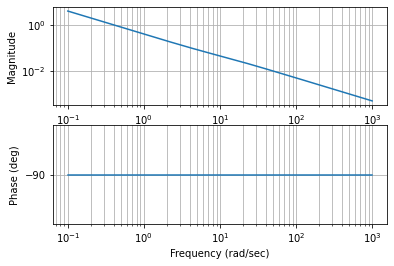

In [21]:
control.bode(tf_20);

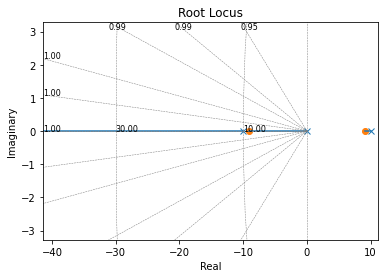

In [22]:
control.rlocus(tf_20);

In [23]:
#Q = pl.eye(sys0.A.shape[0])
#R = pl.eye(sys0.B.shape[1])
Q = Matrix([ [50,0,0,0],
             [0,10,0,0],
             [0,0,1,0],
             [0,0,0,1] ])
R = 0.1
Q, R

⎛⎡50  0   0  0⎤     ⎞
⎜⎢            ⎥     ⎟
⎜⎢0   10  0  0⎥     ⎟
⎜⎢            ⎥, 0.1⎟
⎜⎢0   0   1  0⎥     ⎟
⎜⎢            ⎥     ⎟
⎝⎣0   0   0  1⎦     ⎠

In [24]:
K, S, E = control.lqr(sys0.A, sys0.B, Q, R)
K, S, E

(array([[-22.36067977, -80.29456646, -16.26693425,  -8.83661029]]),
 array([[36.37397076, 19.7592613 , 12.73065749,  2.06433521],
        [19.7592613 , 36.95733391, 12.31012064,  3.40428407],
        [12.73065749, 12.31012064,  7.24504011,  1.25981124],
        [ 2.06433521,  3.40428407,  1.25981124,  0.363256  ]]),
 array([-18.537584 +0.j       ,  -5.9760613+0.j       ,
         -2.0860484+1.9724057j,  -2.0860484-1.9724057j], dtype=complex64))

In [25]:
sysc = sys0.feedback(K)
sysc

StateSpace(array([[   0.        ,    0.        ,    1.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ],
       [  11.18033989,   37.69728323,    8.13346712,    4.41830515],
       [ -93.16949906, -232.47736023,  -67.77889269,  -36.81920955]]), array([[ 0.        ],
       [ 0.        ],
       [ 0.5       ],
       [-4.16666667]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), array([[0.],
       [0.],
       [0.],
       [0.]]))

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

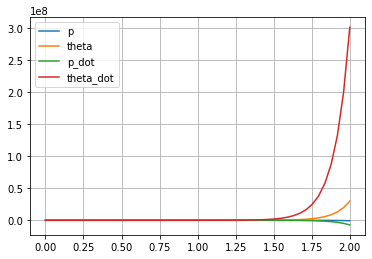

In [27]:
# Open-loop Simulation
ss = sys0
def model_open(X, t, u):
    Aop = ss.A
    Bop = ss.B
    
    Xd = Aop@X + Bop.T[0]*u
    return Xd

# initial condition
x0 = [0,0.1,0,0]

# time points
t = np.linspace(0,2)

# solve ODEs
u = 0
y = odeint(model_open, x0, t, args=(u,))
pl.plot(t, y);
pl.legend(['p','theta','p_dot','theta_dot'], loc='best')
pl.grid()

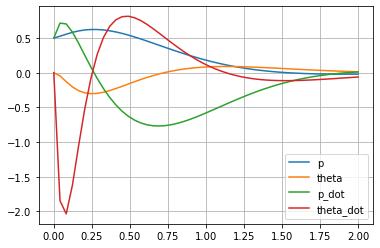

In [28]:
x0 = [0.5, 0, 0.5, 0]
u = 0
dt = 0.01
tf = 2
t, y = control.forced_response(sysc, X0=x0, T=pl.linspace(0,tf), transpose=True)
h_fr = pl.plot(t, y);
pl.legend(['p','theta','p_dot','theta_dot'], loc='best')
pl.grid()

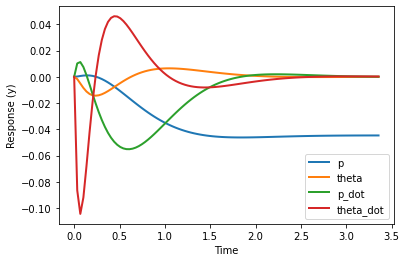

In [29]:
from scipy import signal
import matplotlib.pyplot as plt

sys2 = signal.StateSpace(sysc.A, sysc.B, sysc.C, sysc.D)
t2,y2 = signal.step(sys2)

du = 1.0    # change in u

plt.figure(1)
#plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,linewidth=2)
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(['p','theta','p_dot','theta_dot'], loc='best')
plt.show()

In [30]:
'''
# Closed-loop Simulation
ss = sys0

def model_closed(X, t, K, Xdes):
    global Xref
    Aop = ss.A
    Bop = ss.B
    
    if t<2:
        Xgoal = [0,0,0,0]
    if t>=2:
        Xgoal = Xdes
    if t>=7:
        Xgoal = [0,0,0,0]
        
    u = K[0][1:]@(Xgoal[1:] - X[1:])
    Xd = Aop@X + Bop.T[0]*u

    return Xd

# initial condition
# [pdot, theta, theta_dot]
X0 = [0,0,0,0]
Xdes = [0,0,1,0]

tf = 10
dt = 0.01
N = int(tf/dt)

# time points
t = np.linspace(0,10,N)

# solve ODEs
y = odeint(model_closed, X0, t, args=(K,Xdes))

pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(221);
pl.plot(t, y[:,0]);
pl.legend(['p'], loc='best')
pl.grid()

pl.subplot(223);
pl.plot(t, y[:,2]);
pl.legend(['p_dot'], loc='best')
pl.grid()

pl.subplot(222);
pl.plot(t, y[:,1]);
pl.legend(['theta'], loc='best')
pl.grid()

pl.subplot(224);
pl.plot(t, y[:,3]);
pl.legend(['theta_dot'], loc='best')
pl.grid()
'''

"\n# Closed-loop Simulation\nss = sys0\n\ndef model_closed(X, t, K, Xdes):\n    global Xref\n    Aop = ss.A\n    Bop = ss.B\n    \n    if t<2:\n        Xgoal = [0,0,0,0]\n    if t>=2:\n        Xgoal = Xdes\n    if t>=7:\n        Xgoal = [0,0,0,0]\n        \n    u = K[0][1:]@(Xgoal[1:] - X[1:])\n    Xd = Aop@X + Bop.T[0]*u\n\n    return Xd\n\n# initial condition\n# [pdot, theta, theta_dot]\nX0 = [0,0,0,0]\nXdes = [0,0,1,0]\n\ntf = 10\ndt = 0.01\nN = int(tf/dt)\n\n# time points\nt = np.linspace(0,10,N)\n\n# solve ODEs\ny = odeint(model_closed, X0, t, args=(K,Xdes))\n\npl.figure(1, figsize=(15,12), dpi=300)\npl.subplot(221);\npl.plot(t, y[:,0]);\npl.legend(['p'], loc='best')\npl.grid()\n\npl.subplot(223);\npl.plot(t, y[:,2]);\npl.legend(['p_dot'], loc='best')\npl.grid()\n\npl.subplot(222);\npl.plot(t, y[:,1]);\npl.legend(['theta'], loc='best')\npl.grid()\n\npl.subplot(224);\npl.plot(t, y[:,3]);\npl.legend(['theta_dot'], loc='best')\npl.grid()\n"

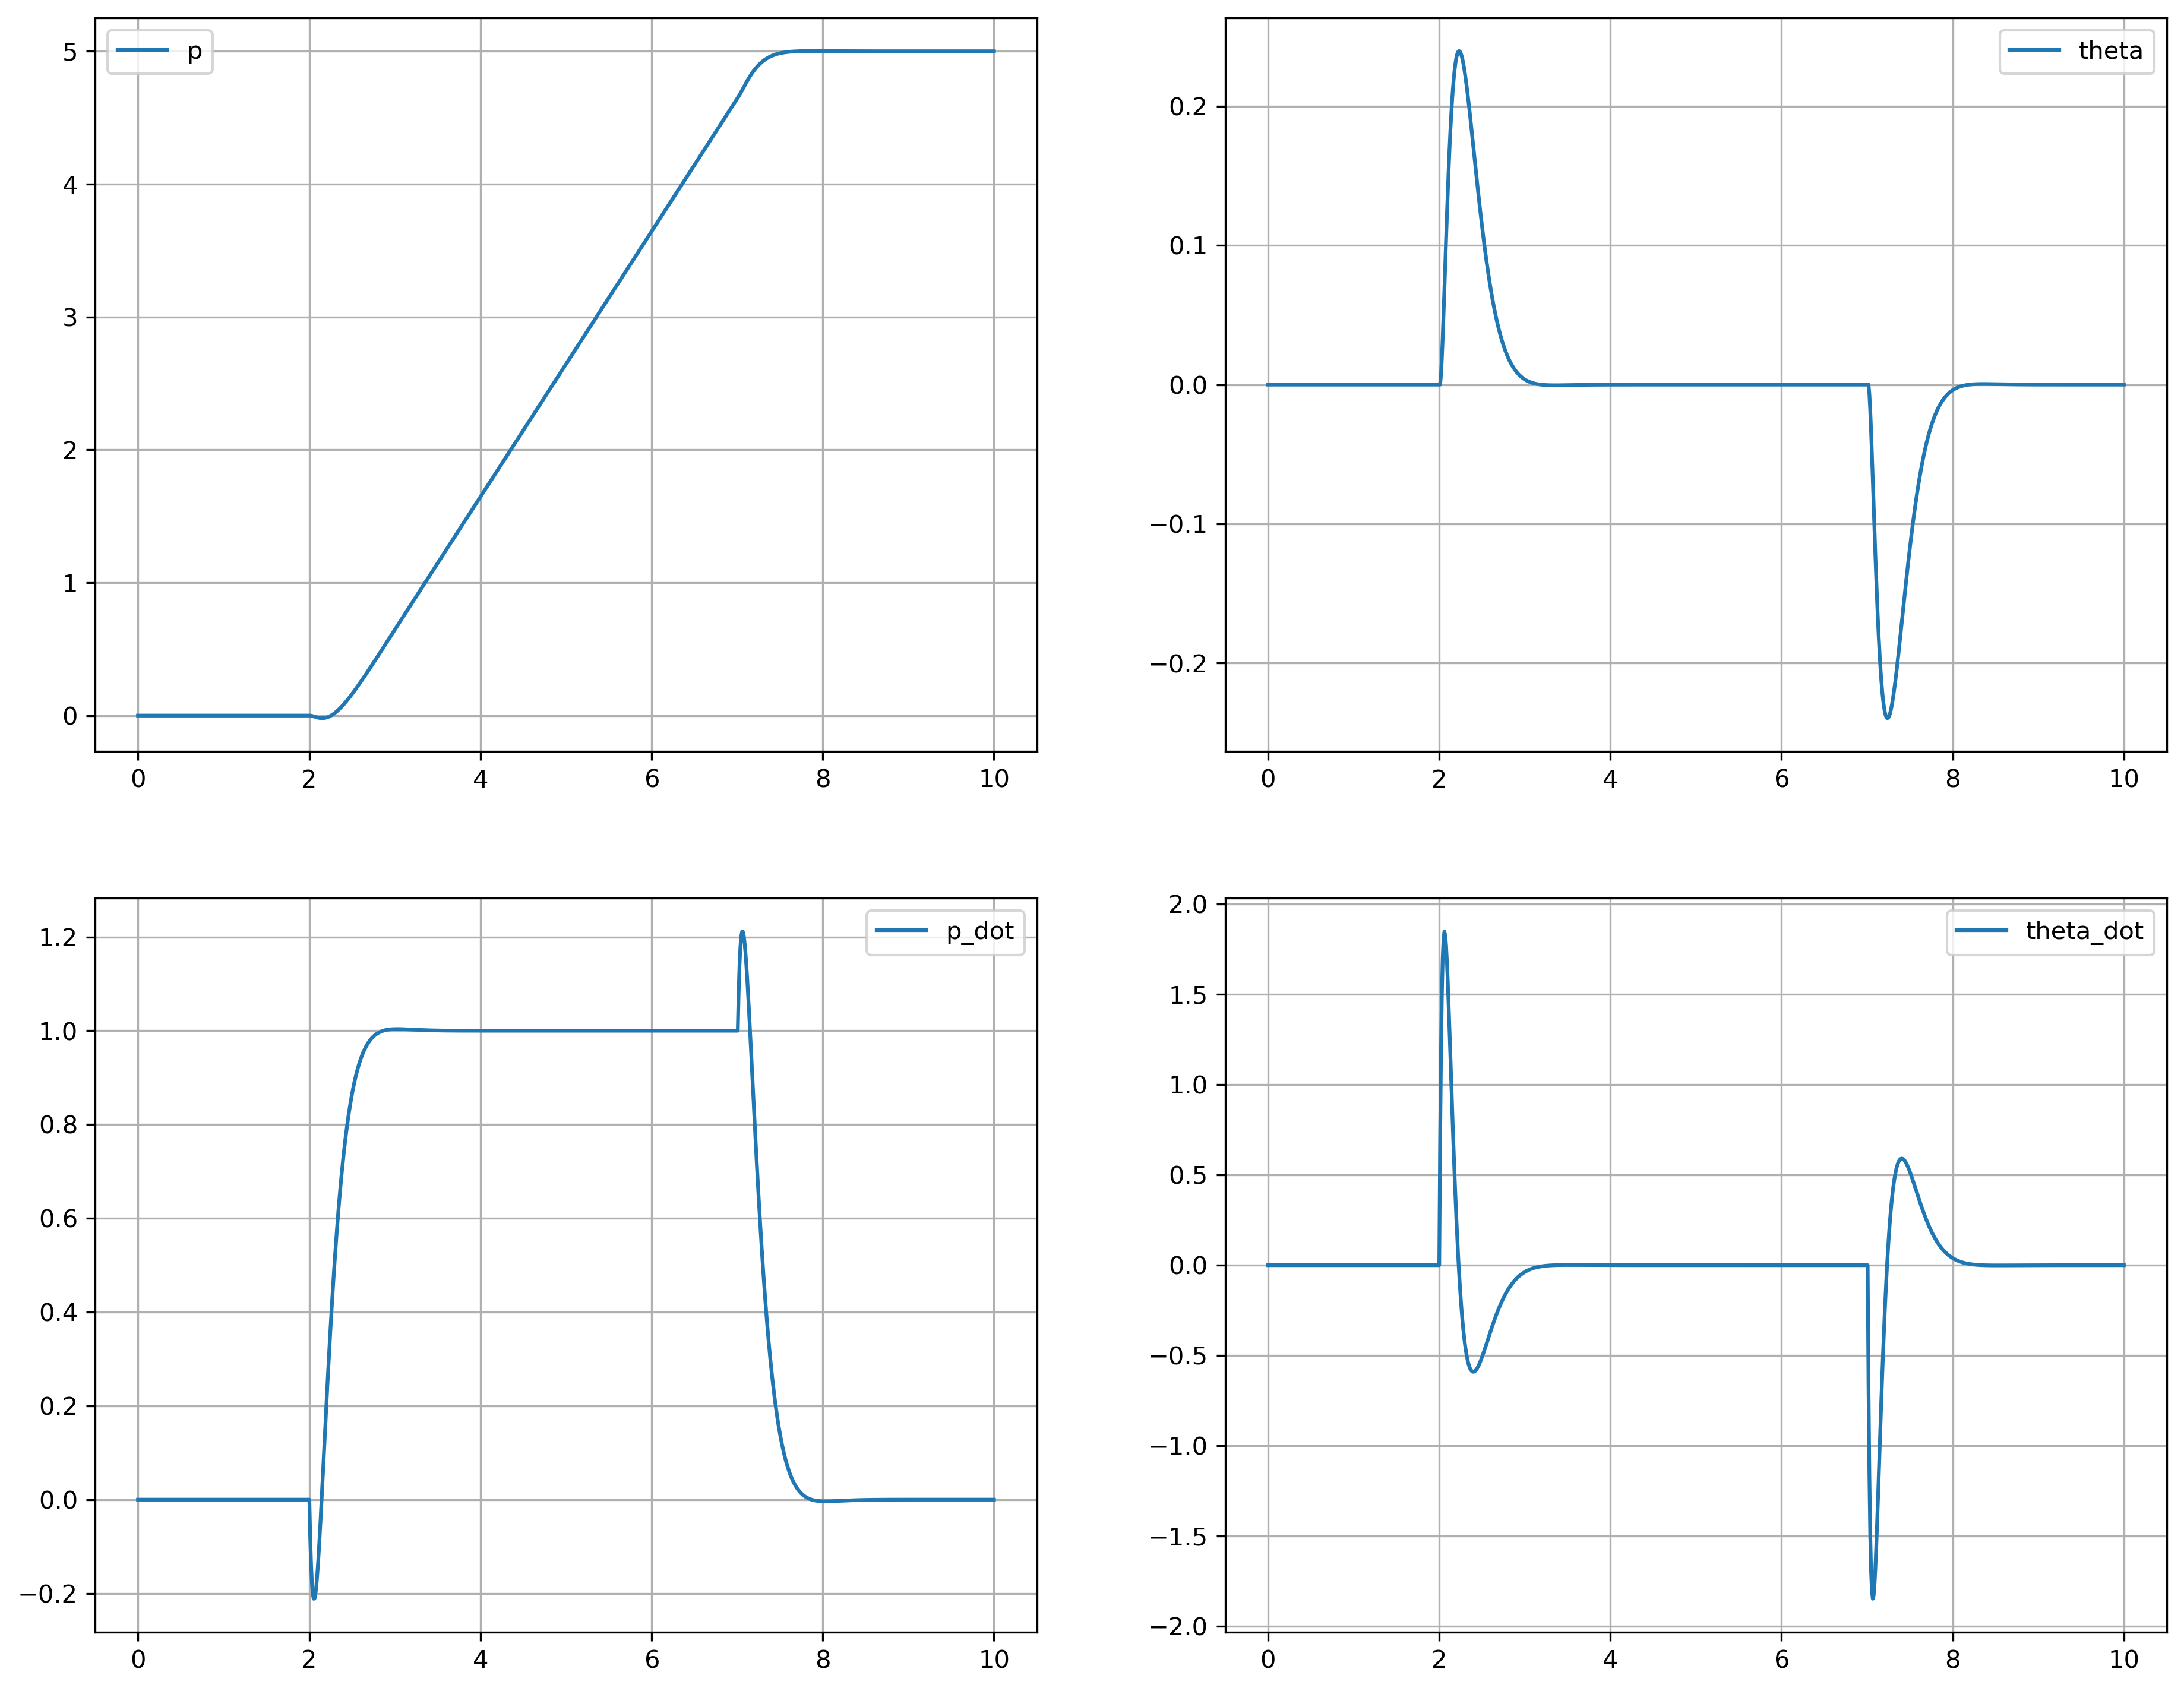

In [31]:
# Closed-loop Simulation
ss = sys0

def simulate_model_closed(X0, Xdes, K_gain, time_array, dt):
    Aop = ss.A
    Bop = ss.B
        
    t = 0
    j = 0
    X = Xref = Xd_prev = Xd = X0
    
    t_save = [0]
    x_save = xref_save = np.array([0,0,0,0])
    u_save = [0]
    
    for i in range(len(time_array)):
        t = time_array[i]
         
        if t<2:
            Xgoal = [0,0,0,0]
        if t>=2:
            Xgoal = Xdes
        if t>=7:
            Xgoal = [0,0,0,0]

        # full-state feedback
        #u = K@(Xgoal - X)

        # partial feedback
        u = K[0][1:]@(Xgoal[1:] - X[1:])
        
        Xd_prev = Xd
        Xd = Aop@X + Bop.T[0]*u
        
        t_save = np.vstack((t_save, t))
        x_save = np.vstack((x_save, X))
        xref_save = np.vstack((xref_save, Xref))
        u_save = np.vstack((u_save, u))
        
        X = X + Xd*dt
        t = t + dt
        i+=1
                 
    return t_save, x_save, xref_save, u_save

# initial condition
# [pdot, theta, theta_dot]
X0 = np.array([0,0,0,0])

tf = 10
dt = 0.01
N = int(tf/dt)

# time points
t = np.linspace(0,10,N)

# simulation
t, x, xref, u = simulate_model_closed(X0, np.array([0,0,1,0]), K, t, dt)

pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(221);
pl.plot(t, x[:,0]);
pl.legend(['p'], loc='best')
pl.grid()

pl.subplot(223);
pl.plot(t, x[:,2]);
pl.legend(['p_dot'], loc='best')
pl.grid()

pl.subplot(222);
pl.plot(t, x[:,1]);
pl.legend(['theta'], loc='best')
pl.grid()

pl.subplot(224);
pl.plot(t, x[:,3]);
pl.legend(['theta_dot'], loc='best')
pl.grid()

In [ ]:
def animate_pendulum(t, states, length, filename=None):
    """Animates the n-pendulum and optionally saves it to file.

    Parameters
    ----------
    t : ndarray, shape(m)
        Time array.
    states: ndarray, shape(m,p)
        State time history.
    length: float
        The length of the pendulum links.
    filename: string or None, optional
        If true a movie file will be saved of the animation. This may take some time.

    Returns
    -------
    fig : matplotlib.Figure
        The figure.
    anim : matplotlib.FuncAnimation
        The animation.

    """
    # the number of pendulum bobs
    numpoints = states.shape[1] / 2

    # first set up the figure, the axis, and the plot elements we want to animate
    fig = plt.figure()
    
    # some dimesions
    cart_width = 0.4
    cart_height = 0.2
    
    # set the limits based on the motion
    xmin = around(states[:, 0].min() - cart_width / 2.0, 1)
    xmax = around(states[:, 0].max() + cart_width / 2.0, 1)
    
    # create the axes
    ax = plt.axes(xlim=(xmin, xmax), ylim=(-1.1, 1.1), aspect='equal')
    
    # display the current time
    time_text = ax.text(0.04, 0.9, '', transform=ax.transAxes)
    
    # create a rectangular cart
    rect = Rectangle([states[0, 0] - cart_width / 2.0, -cart_height / 2],
        cart_width, cart_height, fill=True, color='red', ec='black')
    ax.add_patch(rect)
    
    # blank line for the pendulum
    line, = ax.plot([], [], lw=2, marker='o', markersize=6)

    # initialization function: plot the background of each frame
    def init():
        time_text.set_text('')
        rect.set_xy((0.0, 0.0))
        line.set_data([], [])
        return time_text, rect, line,

    # animation function: update the objects
    def animate(i):
        time_text.set_text('time = {:2.2f}'.format(t[i]))
        rect.set_xy((states[i, 0] - cart_width / 2.0, -cart_height / 2))
        x = hstack((states[i, 0], zeros((numpoints - 1))))
        y = zeros((numpoints))
        for j in arange(1, numpoints):
            x[j] = x[j - 1] + length * cos(states[i, j])
            y[j] = y[j - 1] + length * sin(states[i, j])
        line.set_data(x, y)
        return time_text, rect, line,

    # call the animator function
    anim = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init,
            interval=t[-1] / len(t) * 1000, blit=True, repeat=False)
    
    # save the animation if a filename is given
    if filename is not None:
        anim.save(filename, fps=30, codec='libx264')